# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
import requests
from dotenv import load_dotenv, find_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

C:\Users\Lendl\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lendl\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Lendl\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lendl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv(find_dotenv())
news_api_key = os.getenv("NEWS_API")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news = newsapi.get_everything(
    q="bitcoin AND Bitcoin AND 2021",
    language="en"
)

btc_news["totalResults"]

3250

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_news = newsapi.get_everything(
    q="ethereum AND Ethereum AND 2021",
    language="en"
)

eth_news["totalResults"]

1271

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in btc_news["articles"]:
    text = article["content"]
    title = article["title"]
    date = article["publishedAt"][:10]
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
        
    bitcoin_sentiments.append({
        "Text": text,
        "Date": date,
        "Compound": compound,
        "Positive": pos,
        "Negative": neg,
        "Neutral": neu,
        "Title Bitcoin": title,
    })
        
btc_sentiment_df = pd.DataFrame(bitcoin_sentiments)
btc_sentiment_df.drop(columns=['Date', 'Title Bitcoin'], inplace=True)
cols = ["Compound","Negative","Neutral","Positive","Text"]
btc_sentiment_df = btc_sentiment_df[cols]
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.4019,0.0,0.920,0.080,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...
1,0.7264,0.0,0.836,0.164,While retail investors grew more comfortable b...
2,0.6240,0.0,0.873,0.127,To get a roundup of TechCrunchs biggest and mo...
3,0.5719,0.0,0.861,0.139,"After the bell today, Coinbase reported anothe..."
4,0.0000,0.0,1.000,0.000,Representations of cryptocurrency Bitcoin are ...


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in eth_news["articles"]:
    text = article["content"]
    title = article["title"]
    date = article["publishedAt"][:10]
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
        
    ethereum_sentiments.append({
        "Text": text,
        "Compound": compound,
        "Positive": pos,
        "Negative": neg,
        "Neutral": neu,
    })
        
eth_sentiment_df = pd.DataFrame(ethereum_sentiments)
cols = ["Compound","Negative","Neutral","Positive","Text"]
eth_sentiment_df = eth_sentiment_df[cols]
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.2411,0.061,0.939,0.000,Blockchain infrastructure startups are heating...
1,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...
2,0.5719,0.000,0.861,0.139,"After the bell today, Coinbase reported anothe..."
3,0.0000,0.000,1.000,0.000,Representations of cryptocurrencies Bitcoin an...
4,-0.3612,0.094,0.855,0.050,"By Mary-Ann RussonBusiness reporter, BBC News\..."


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.077875,0.024750,0.932150,0.043100
std,0.371439,0.053646,0.073992,0.054844
min,-0.709600,0.000000,0.724000,0.000000
25%,-0.060275,0.000000,0.906000,0.000000
50%,0.000000,0.000000,0.936000,0.000000
75%,0.371375,0.015250,1.000000,0.079250
max,0.726400,0.217000,1.000000,0.164000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.053935,0.022350,0.942900,0.034700
std,0.297690,0.037015,0.077698,0.059261
min,-0.571900,0.000000,0.782000,0.000000
25%,0.000000,0.000000,0.879000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.044475,0.049750,1.000000,0.054750
max,0.726400,0.110000,1.000000,0.164000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score of 0.039

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score of 0.7717

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score of 0.194

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lendl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lendl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lendl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'chars', 'illustration'}
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    output = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in set(stopwords.words('english'))]
    output2 = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    return output2

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_sentiment_df["Tokens"] = btc_sentiment_df["Text"].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.4019,0.0,0.920,0.080,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,"[photo, joe, raedlegetty, images, twitter, squ..."
1,0.7264,0.0,0.836,0.164,While retail investors grew more comfortable b...,"[retail, investors, grew, comfortable, buying,..."
2,0.6240,0.0,0.873,0.127,To get a roundup of TechCrunchs biggest and mo...,"[get, roundup, techcrunchs, biggest, important..."
3,0.5719,0.0,0.861,0.139,"After the bell today, Coinbase reported anothe...","[bell, coinbase, reported, another, period, im..."
4,0.0000,0.0,1.000,0.000,Representations of cryptocurrency Bitcoin are ...,"[representations, cryptocurrency, bitcoin, see..."


In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_sentiment_df["Tokens"] = eth_sentiment_df["Text"].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.2411,0.061,0.939,0.000,Blockchain infrastructure startups are heating...,"[blockchain, infrastructure, startups, heating..."
1,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[retail, investors, grew, comfortable, buying,..."
2,0.5719,0.000,0.861,0.139,"After the bell today, Coinbase reported anothe...","[bell, coinbase, reported, another, period, im..."
3,0.0000,0.000,1.000,0.000,Representations of cryptocurrencies Bitcoin an...,"[representations, cryptocurrencies, bitcoin, e..."
4,-0.3612,0.094,0.855,0.050,"By Mary-Ann RussonBusiness reporter, BBC News\...","[maryann, russonbusiness, reporter, bbc, newst..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
def get_tokens(df):
    tokens = []
    for token in df['Tokens']:
        tokens.extend(token)
    return tokens

btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

def bigram_counter(tokens, N): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bigram_btc = bigram_counter(btc_tokens, 2)


In [17]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_eth = bigram_counter(eth_tokens, 2)

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_token_count = token_count(bigram_btc, 10)
btc_token_count

[(('taken', 'june'), 5),
 (('picture', 'taken'), 4),
 (('bitcoin', 'seen'), 3),
 (('seen', 'picture'), 3),
 (('june', 'reutersedgar'), 3),
 (('bitcoin', 'ethereum'), 2),
 (('cryptocurrency', 'bitcoin'), 2),
 (('reuters', 'bitcoin'), 2),
 (('prices', 'go'), 2),
 (('august', 'min'), 2)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_token_count = token_count(bigram_eth, 10)
eth_token_count

[(('taken', 'june'), 7),
 (('bitcoin', 'ethereum'), 4),
 (('representations', 'cryptocurrencies'), 4),
 (('placed', 'pc'), 4),
 (('pc', 'motherboard'), 4),
 (('motherboard', 'taken'), 4),
 (('june', 'reutersdado'), 4),
 (('bitcoin', 'seen'), 4),
 (('cryptocurrencies', 'bitcoin'), 3),
 (('ethereum', 'placed'), 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

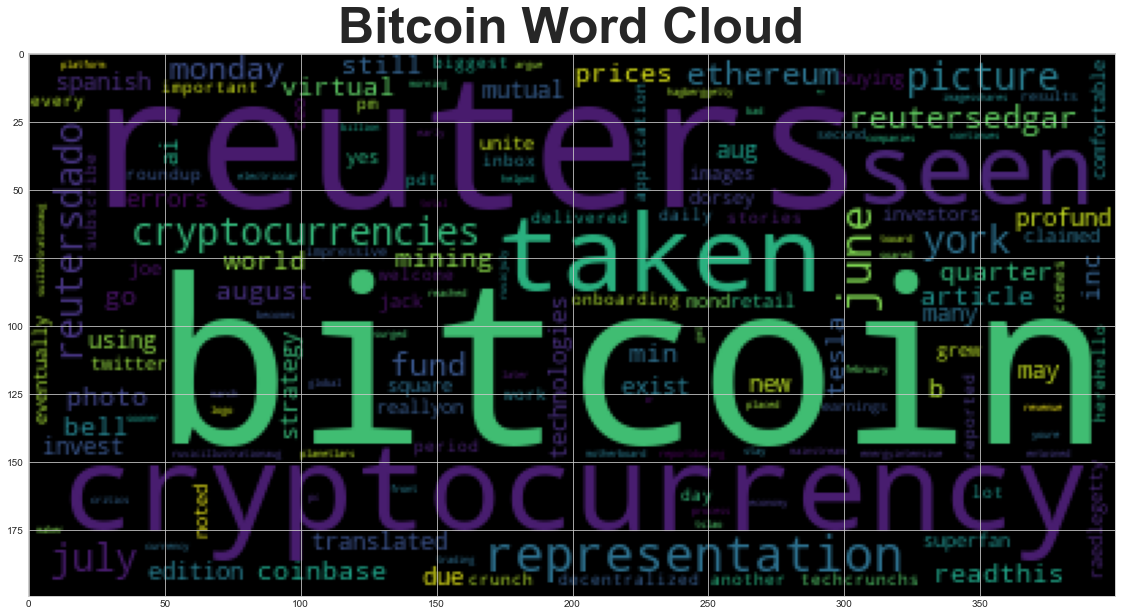

In [22]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
cloud = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(cloud)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

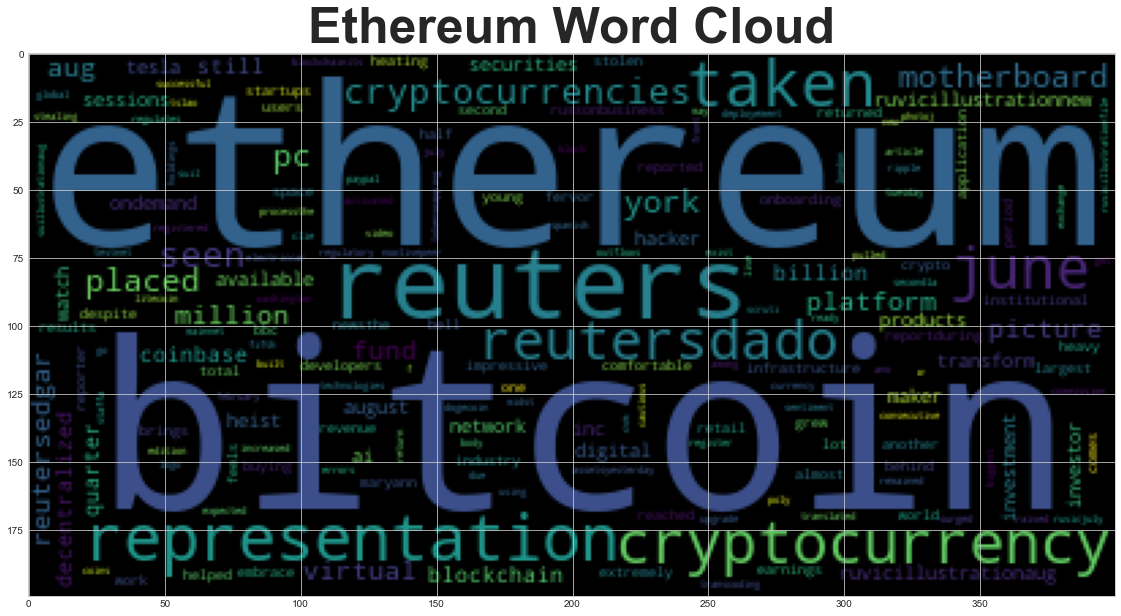

In [23]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
cloud = WordCloud(collocations=False).generate(' '.join(eth_tokens))
plt.imshow(cloud)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_texts = ' '.join(btc_sentiment_df['Text'])
print(btc_texts)

Photo by Joe Raedle/Getty Images

 

 Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.
On Mond… [+2119 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.
Hello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars] After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.
During the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars] Representations of cryptocurrency Bitcoin are seen in this picture illustration taken June 7, 2021. REUTERS/Edgar Su/IllustrationAug 13 (Reuter

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc= nlp(btc_texts)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [30]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Joe Raedle PERSON
Twitter PRODUCT
Square PRODUCT
Jack Dorsey PERSON
Monday DATE
Bitcoin and Ethereum ORG
2021 DATE
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
June 7, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationAug PERSON
Reuters ORG
7.07% PERCENT
47,587.38 MONEY
2200 CARDINAL
Lars Hagberg PERSON
Getty Images ORG
early Monday DATE
morning TIME
February 9, 2021 DATE
REUTERS ORG
Dado GPE
Reuters ORG
Tesla Inc ORG
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
REUTERS ORG
Dado Ruvic/Illustration
Welcome PERSON
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Reuters ORG
July 13, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration ORG
Reuters ORG
Monday DATE
August DATE
6, 2021 DATE
Spanish NORP
AI ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationNEW PERSON
July 19 DATE
Reuters ORG
June 14, 2021 DATE
REUTERS

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_texts = ' '.join(eth_sentiment_df['Text'])
print(eth_texts)

Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.
During the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars] Representations of cryptocurrencies Bitcoin and Ethereum are placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dado Ruvic/IllustrationAug 3 (Reuters) - The Ethereum platform… [+2412 chars] By Mary-Ann RussonBusiness reporter, BBC News
The hacker behind one of the largest ever cryptocurrency heists ever has returned almost half o

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc= nlp(eth_texts)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [34]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Bitcoin and Ethereum ORG
2021 DATE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
BBC News ORG
almost half CARDINAL
$600m MONEY
433 MONEY
Yesterday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 10 PERSON
Reuters ORG
+991 PERSON
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
NEW YORK GPE
Reuters ORG
a fifth consecutive week DATE
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 9 DATE
Reuters ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationAug PERSON
Reuters ORG
7.07% PERCENT
47,587.38 MONEY
2200 CARDINAL
WASHINGTON GPE
Aug 12 DATE
Re

---